In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

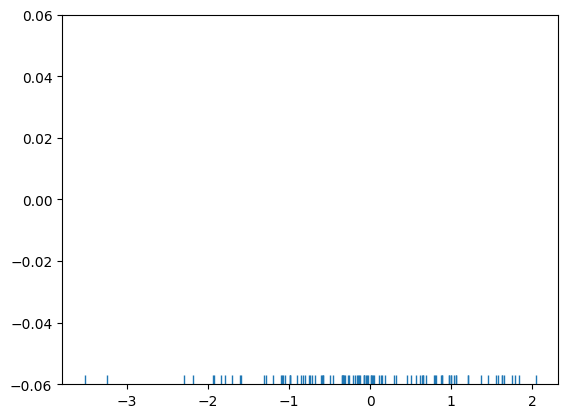

In [ ]:
#create dataset
dataset=np.random.randn(100)
#create another rugplot
sns.rugplot(dataset);
#set up the x-axis for the plot
x_min=dataset.min()-2
x_max=dataset.max()+2
#100 equally spaced points from x_min to x_max
x_axis=np.linspace(x_min,x_max,100)

In [ ]:
print(x_min,x_max)

-5.52275834888391 4.040369728711761


In [ ]:
#set up the bandwidth, for info on this:
url='http://en.wikipedia.org/wimo/kernel_density_estimation#Practical_estimation_of_the_bandwidth'
bandwidth=((4*dataset.std()**-0.5)/(3*len(dataset)))**0.2
bandwidth

0.4174053639916181

(0.0, 1.0)

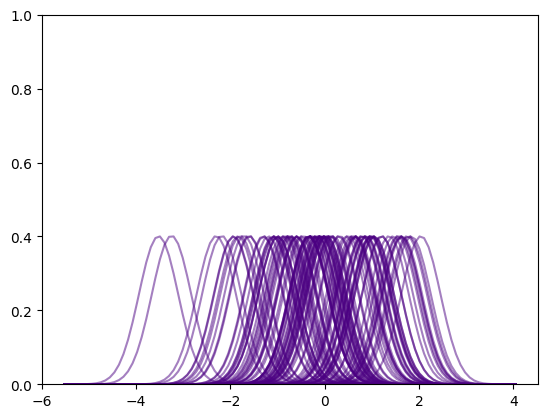

In [ ]:
#create an empty kernel list
kernel_list=[]
#plot each basis fun
for data_point in dataset:
  #create a kernel for each point and append to list
  kernel=stats.norm(data_point,bandwidth).pdf(x_axis)
  kernel_list.append(kernel)
  #scale for plotting
  kernel=kernel/kernel.max()
  kernel=kernel*.4
  plt.plot(x_axis,kernel,color='indigo',alpha=0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

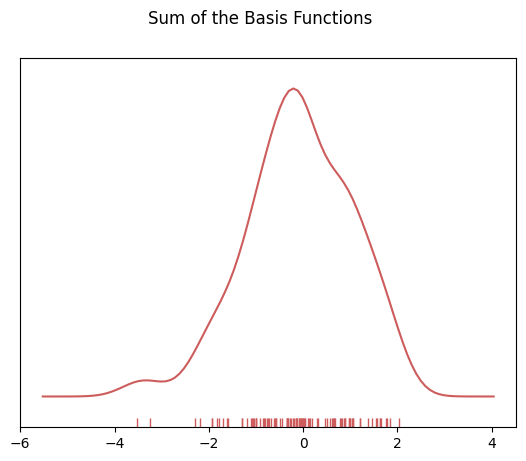

In [ ]:
#to get the kde plot we can sum these basis fun.
#plot the sum of the basis fun
sum_of_kde=np.sum(kernel_list,axis=0)
#plot fig
fig=plt.plot(x_axis,sum_of_kde,color='indianred')
#add the initial rugplot
sns.rugplot(dataset,c='indianred')
#get rid of y-tick marks
plt.yticks([])
#set title
plt.suptitle("Sum of the Basis Functions")
